# Overview

This week we'll get started on modern network science. We'll focus on two key results that kick-started a revolution in our understanding of networks.

* Problems with random networks as models for real networks and the Watts-Strogatz model
* Scale-free networks and the Barabasi-Albert model

In addition to this, we will also talk about the 
* Configuration model for creating random networks.

But before we can get started, there's the bookkeeping stuff, the admin things. Do watch it - the material below tells you about key elements of how to do well in class, assignments and stuff.

And the good news is that after today, we can take it easy with admin stuff for a while. We'll restart this aspect when we get closer to the project assignments that we finish the class with.

# Part 0.0: Two surveys to help improve this course

I want to give you the best-possible course. To do this, I collect data from you while this course is running. Today, I will collect 2 surveys.

### Survey 1:
This survey will help me understand how the first couple of weeks affected your perceptions of Networks and this course. Please go to [DTU learn](https://learn.inside.dtu.dk/) -> Activities -> Surveys and complete the survey "My thoughts on Social Graphs and Interactions II" and help me improve this course.

### Running evaluation 1
I want to hear your thoughts on the way we are running this course so that I can improve the course while you are still taking it. Please think of what you like and dislike about the course and share your constructive suggestions with me on [DTU learn](https://learn.inside.dtu.dk/) -> Activities -> Surveys -> "Running evaluation of course I"

> You can hear me describe the thoughts behind this evaluation in this [video lecture](https://www.dropbox.com/scl/fi/ytursoj8rls423bcnpz6q/RunningEvaluationI.mp4?rlkey=58093lleggkpha85dtubxq1kf&dl=0)

**_Thanks so much for helping us improve the course!_**


# Part 0.1: The admin stuff 
### (Why we use Peer Evaluations Edition)

We use the system [Peergrade.io](http://peergrade.io/) to get you better feedback and make you smarter. In the video below, I explain why that is the case. There are a lot of good reasons that peer evaluations are great, so watch [the video](https://www.dropbox.com/scl/fi/r4liy92ell1dkjq1ye9v4/AdminWeek3.mp4?rlkey=0coke8ubcmapkxbznrx3ndqc7&dl=0) :)

Link: https://www.dropbox.com/scl/fi/r4liy92ell1dkjq1ye9v4/AdminWeek3.mp4?rlkey=0coke8ubcmapkxbznrx3ndqc7&dl=0

# Part 1: Small world networks

Once again, we'll start with some lecturing. So it's time to [watch a little video](https://www.dropbox.com/scl/fi/8b65w8vkitxlgc3huzy6p/SmallWorlds.mp4?rlkey=are1v0hu7l42gau9qxbisuj1q&dl=0) to get you started.

> **_Video Lecture_**: Some properties of real world networks. Clustering and small paths. The Watts-Strogatz model.  Link: https://www.dropbox.com/scl/fi/8b65w8vkitxlgc3huzy6p/SmallWorlds.mp4?rlkey=are1v0hu7l42gau9qxbisuj1q&dl=0
> 

Next up is fun with reading the textbook. There's lots of goodies left in Chapter 3 that covers the stuff I've just covered in the video from a slightly different angle. 
> 
> *Reading*: For this part, we'll read the remaining part of *Network Science* Chapter 3, Section 3.5 - 3.10, with ***emphasis*** on 3.8 and 3.9\.
> 


> *Exercises*: Did you really read the text? Answer the following questions (no calculations needed) in your IPython notebook. 
> 
> * What's the problem with random networks as a model for real-world networks according to the argument in section 3.5 (near the end)?

##### Answer
It doesn't take into account the outliers. Those with few friends and those well connected like president Franklin Roosevelt with 22.000 connections.
> * List the four regimes that characterize random networks as a function of $\langle k \rangle$.

##### Answer
Subcritical $<k>$ < 1: Very few connections between nodes and no large groups of interconnected nodes.

Critical $<k>$ = 1: Just at the point where a large group of interconnected nodes is starting to form.

Supercritical $<k>$ > 1: A large group of interconnected nodes has formed and grows as more connections are added. (most likely resembles real world networks if it coexists with disconnected/isolated components)

Connected: as $<k>$ increases a point is reached where almost all nodes are part of a single component. occurs when k is signifanctly larger than 1. a few nodes not part of the giant component. 


![Alt text](image.png)

> * According to the book, why is it a problem for random networks (in terms of being a model for real-world networks) that the degree-dependent clustering $C(k)$ decreases as a function of $k$ in real-world networks?
>
##### Answer 
In real life, nodes with fewer connections often form tightly connected groups, while nodes with many connections are spread out. Random networks don't show this behavior, as all nodes, regardless of how many connections they have, are equally likely to be connected to each other. This makes random networks a poor representation of real-world networks.

The next set of exercises departs from the book by presenting a little study of the Watts-Strogatz (WS) model. We're going to see just how few random links the WS model needs to dramatically shorten the path-lengths in the network. And while doing that, we'll practice using `networkx`, writing loops, and plotting nice figures.

> *Exercises*: WS edition.


> 
> * First, let's use `networkx` to play around with WS graphs. Use `nx.watts_strogatz_graph` to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity $p = 0, 0.1,$ and  $1$. Calculate the average shortest path length $\langle d \rangle$ for each one. Describe what happens to the network when $p = 1$.

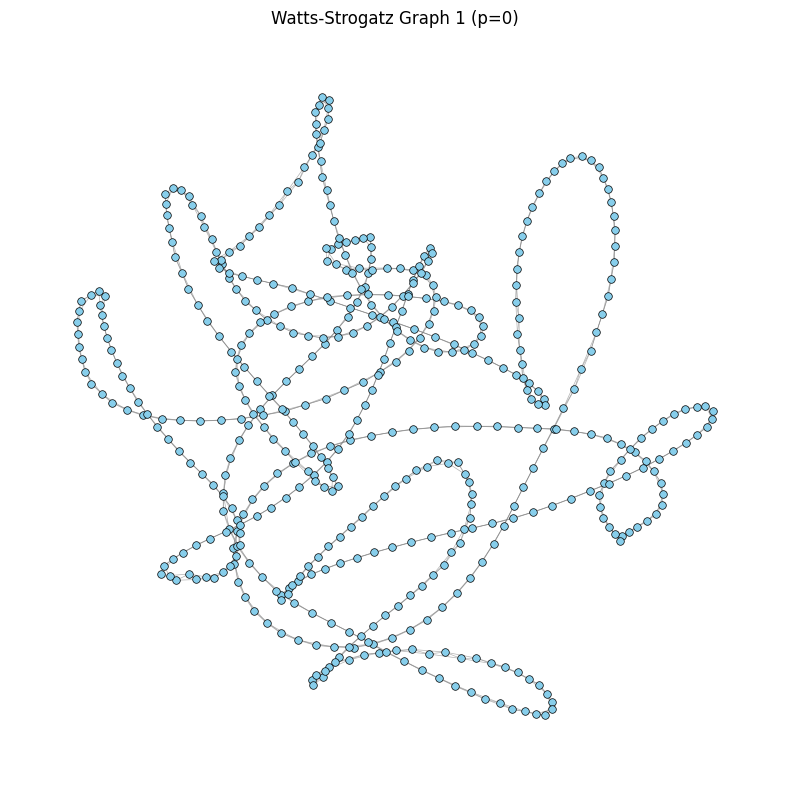

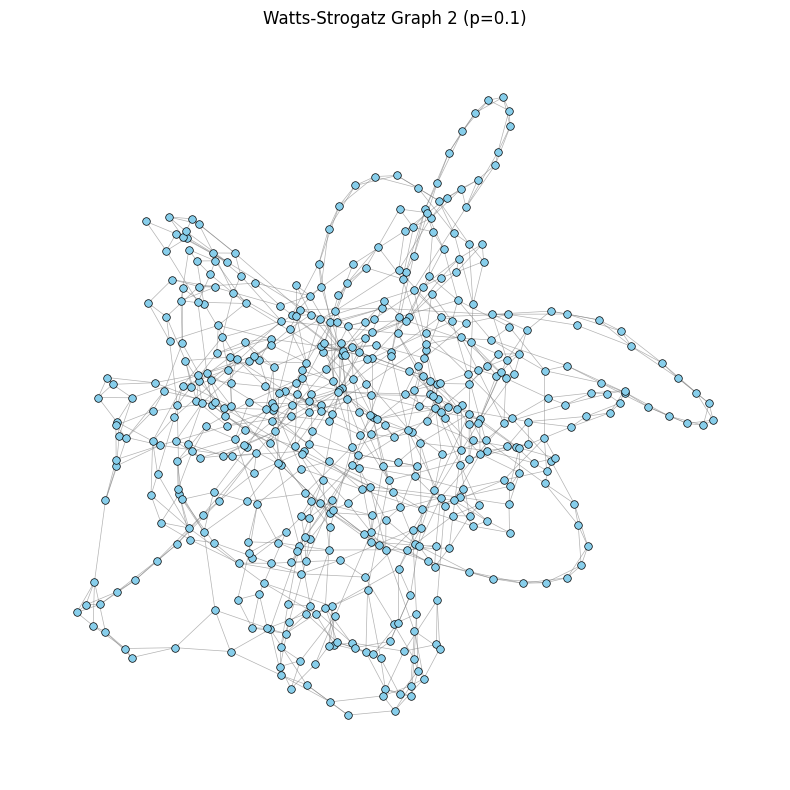

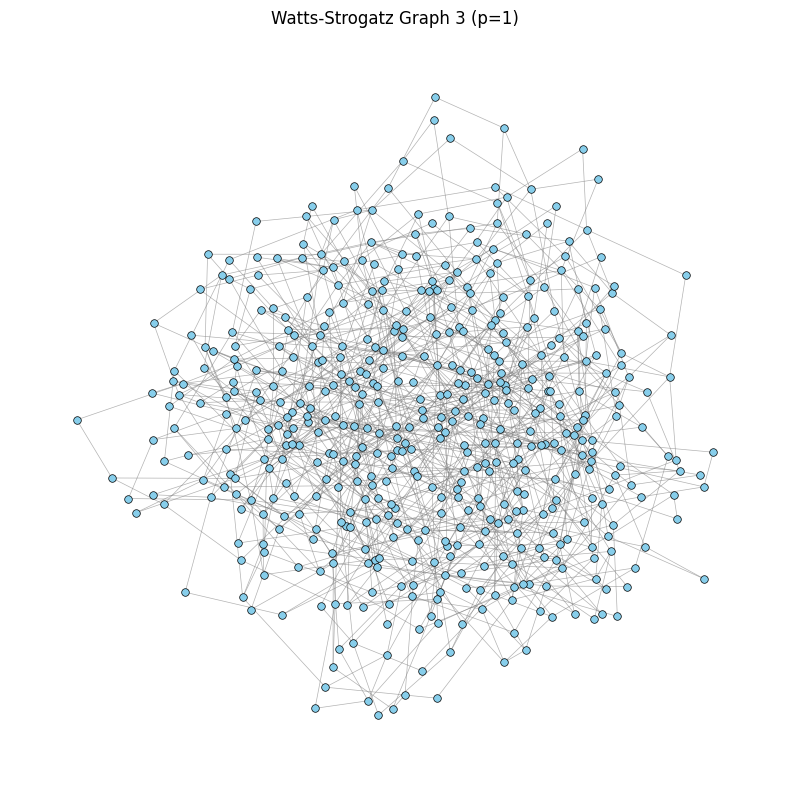

[62.875751503006015, 7.918733466933868, 4.753811623246493]

In [5]:
# Corrected parameters
p_values = [0, 0.1, 1]

# Generate 3 graphs with different rewiring probabilities
graphs = [nx.watts_strogatz_graph(n, k, p_val) for p_val in p_values]

# Lists to store average shortest path lengths
avg_path_lengths_corrected = []

# Iterate over graphs, visualize them, and compute average shortest path lengths
for i, (graph, p_val) in enumerate(zip(graphs, p_values), 1):
    plt.figure(i, figsize=(8,8))
    
    # Use spring layout
    pos = nx.spring_layout(graph)
    
    # Draw nodes and edges
    nx.draw_networkx_nodes(graph, pos, node_size=30, node_color="skyblue", edgecolors="black", linewidths=0.5)
    nx.draw_networkx_edges(graph, pos, width=0.5, edge_color="grey", alpha=0.6)
    
    plt.title(f"Watts-Strogatz Graph {i} (p={p_val})")
    plt.axis("off")
    plt.tight_layout()
    plt.show()
    
    # Compute average shortest path length
    avg_path_length = nx.average_shortest_path_length(graph)
    avg_path_lengths_corrected.append(avg_path_length)

avg_path_lengths_corrected



> * Generate a lot of networks with different values of $p$. You will notice that paths are short when $p$ is close to one and they are long when $p = 0$. What's the value of $p$ for which the average shortest path length gets close to the short paths we find in a fully randomized network.


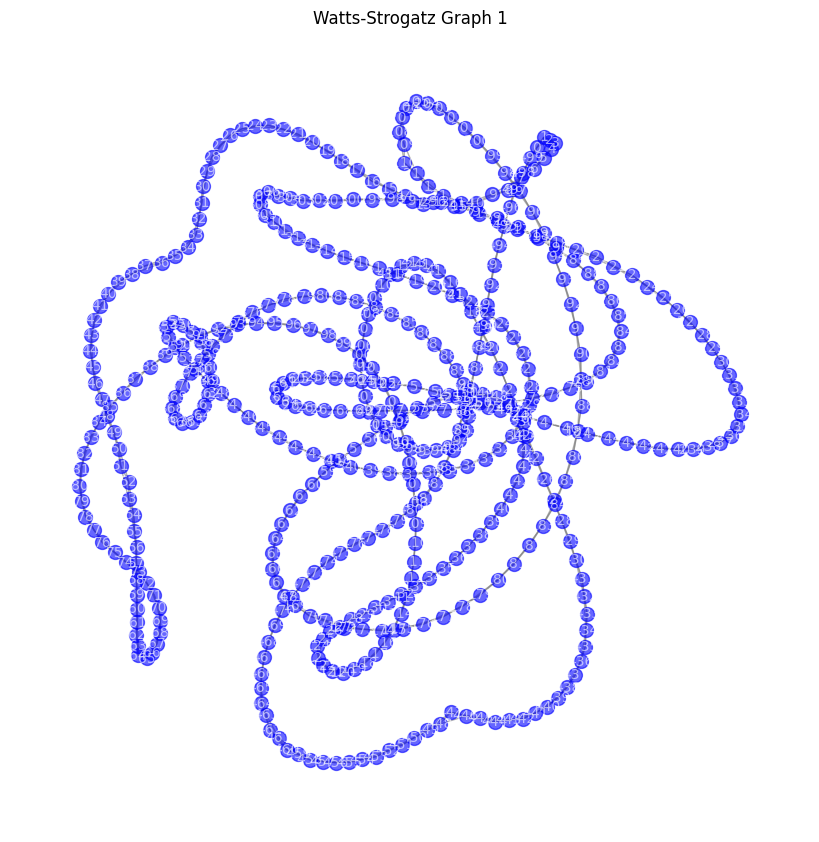

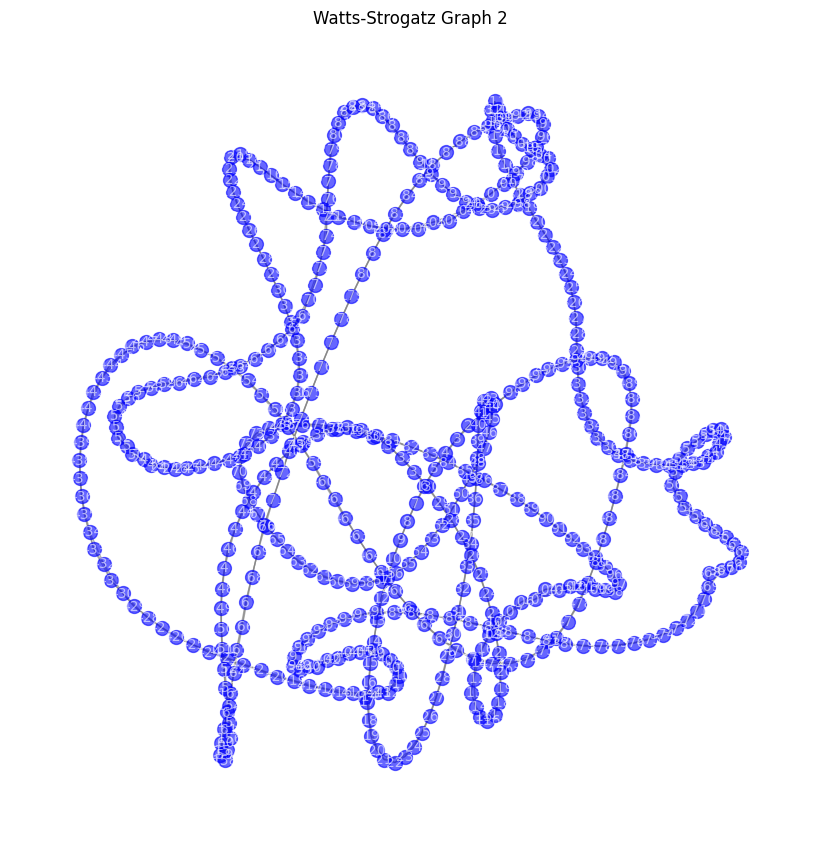

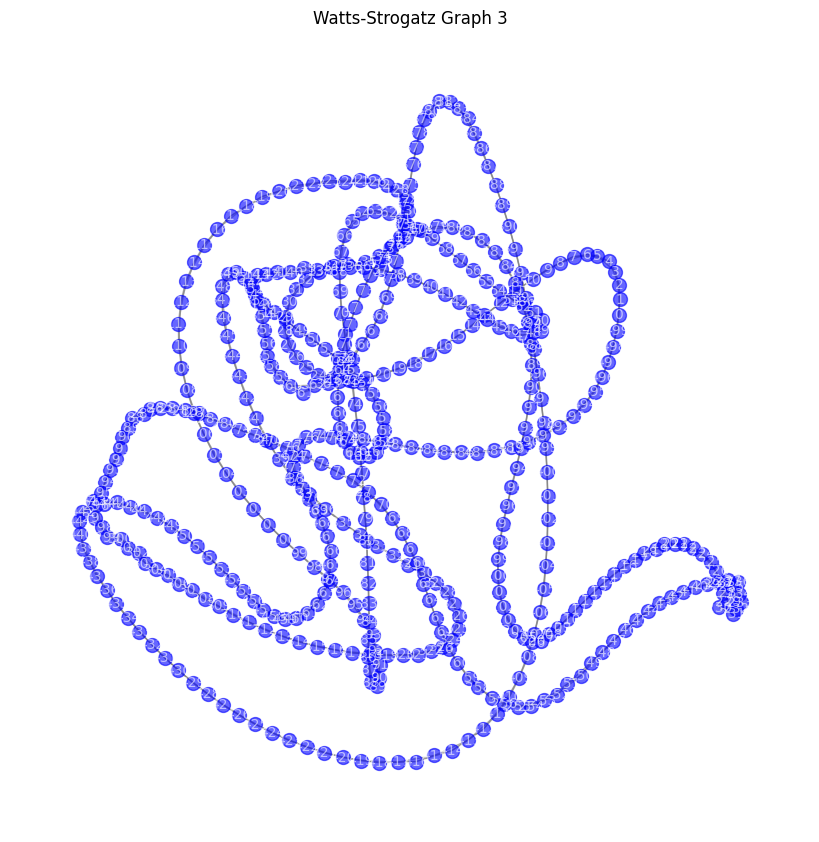

In [25]:
import networkx as nx
import matplotlib.pyplot as plt

n = 500
k = 4
p = 0.0

graphs = [nx.watts_strogatz_graph(n, k, p) for _ in range(3)]

for i, graph in enumerate(graphs,1):
    plt.figure(figsize=(8,8), num=i)

    pos=nx.spring_layout(graph)
    
    nx.draw(graph, pos, with_labels=True, node_size=100, node_color="blue", edge_color="grey", alpha=0.6, font_size=10, font_color="white")
    plt.title(f"Watts-Strogatz Graph {i}")
    plt.show()

> 
> * Let's investigate this behavior in detail. Generate 50 networks with $N = 500$, $\langle k \rangle = 4$, for each of $p = \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}$. Calculate the average of $\langle d \rangle$ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add [errorbars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html) to the plot. My version of the plot is below (since a picture's worth 1000 words).
> 

![Sune's version](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2021/main/files/ws.png)

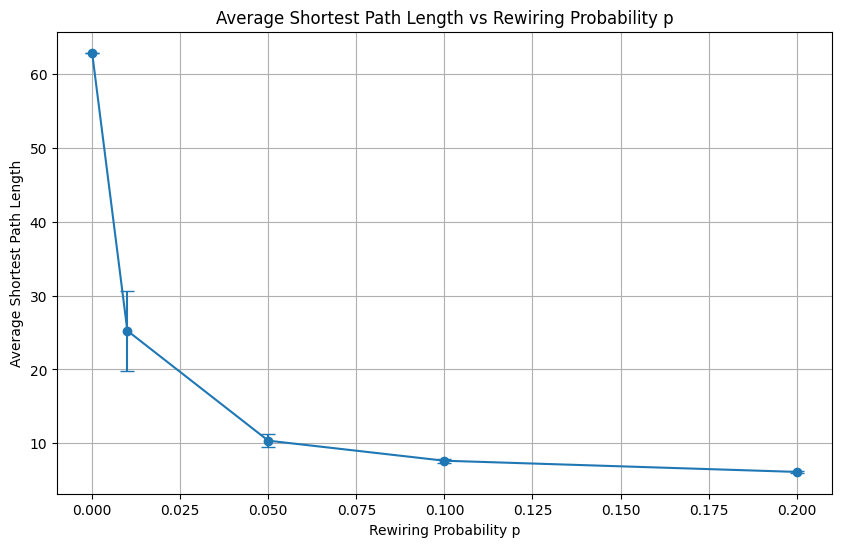

In [28]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

n = 500
k = 4
p_values = [0,0.01,0.05,0.1,0.2]
num_networks = 50

# Calculate average shortest path length for each p value
avg_d_values = []
std_d_values = []

for p in p_values:
    d_values = []
    
    for _ in range(num_networks):
        G = nx.watts_strogatz_graph(n, k, p)
        d = nx.average_shortest_path_length(G)
        d_values.append(d)
    
    avg_d_values.append(np.mean(d_values))
    std_d_values.append(np.std(d_values))

# Plotting the results with error bars
plt.figure(figsize=(10, 6))
plt.errorbar(p_values, avg_d_values, yerr=std_d_values, fmt='-o', capsize=5)
plt.title("Average Shortest Path Length vs Rewiring Probability p")
plt.xlabel("Rewiring Probability p")
plt.ylabel("Average Shortest Path Length")
plt.grid(True)
plt.show()

## Part 2: Scale-free networks

The text book uses two whole chapters on the scale free property. We'll try to cover it a bit faster. As always, [let's start by getting my take on the whole thing](https://www.dropbox.com/scl/fi/tn4dxkwe3w58qtdaxx077/BarabasiAlbert.mp4?rlkey=xw7fkwti5xdt81ej7p2ky22vr&dl=0).

> **_Video Lecture_**: The scale free property and the Barabasi-Albert Model. Link: https://www.dropbox.com/scl/fi/tn4dxkwe3w58qtdaxx077/BarabasiAlbert.mp4?rlkey=xw7fkwti5xdt81ej7p2ky22vr&dl=0
> 

And now it's time for you guys to read. Recall that Barabasi (who wrote the textbook) discovered power-laws.

> *Reading*: Now we dig into the extended history and and theory behind Scale-Free networks and the Barabasi-Albert Model.
> 
> * Chapter 4, Section 4.1 - 4.7\.
> * Chapter 5, section 5.1 - 5.5\.
> 

> *Exercises*: BA edition.
> 
> First a couple of questions to make sure that you've actually read the text.
> 
> * What are the three slope dependent regimes of complex networks with power-law degree distributions? Briefly describe each one. (You will have to skim chp 4.7 to answer this one).

##### Answer


1. Anomalous Regime ($2 < \gamma \leq 3$):
- **Description**: City Analogy: A city dominated by a few colossal skyscrapers and many smaller structures.
Network Description: Here, a small number of nodes (like popular websites or influential people) have an extremely high number of connections. They're the "superstars" of the network. However, many other nodes have very few connections. This extreme variation makes the network very diverse in terms of connectivity.

2. Scale-Free Regime ($3 < \gamma \leq 4$):
- **Description**: City Analogy: A city with a balanced skyline: a few tall buildings, a good number of medium-height structures, and many smaller buildings.
Network Description: This is a more balanced network. While there are still hubs (nodes with many connections), they aren't as dominant as in the anomalous regime. Many nodes have a moderate number of links, making this a somewhat even playing field.

3. Random Network Regime ($\gamma > 4$):
- **Description**: City Analogy: A city where nearly all buildings have a similar height, with very few variations.
Network Description: In this setup, most nodes in the network have a similar number of connections. There aren't many standout "superstar" nodes. It's like everyone in the network has a similar level of influence or popularity.





> * What are the three regimes we find in non-linear preferential attachement? (chapter 5) Briefly describe each one.
>
#### Answer

1. Sublinear Regime ($0 < \beta < 1$):
- **Description**: Growth of nodes is slower than linear. Hubs (nodes with many connections) emerge, but they don't dominate as much. The network becomes more evenly distributed in terms of connections, reducing the "rich-get-richer" effect.

2. Linear Regime ($\beta = 1$):
- **Description**: This represents the standard growth model where nodes with more connections get new connections proportionally. A few dominant hubs emerge, showing the classic rich-get-richer phenomenon.

3. Superlinear Regime ($\beta > 1$):
- **Description**: Hubs grow at an accelerated rate. Nodes with more connections gain new ones at a much faster rate, leading to a few super-hubs dominating the network and most other nodes having few links.

> We're going to create our own Barabasi-Albert model (a special case) in right in a `notebook`. Follow the recipe below for success:
> 
> * First create a graph consisting of a single link. (You can call the nodes anything, but I would simply use integers as names).
> * Now add another node, connecting one of the existing nodes in proportion to their degree.
> * Keep going until you have a 100 node network.
>   * *Hint*: The difficult part here is connecting to each node according to their degree. The way I do it is: generate a list of all edges (e.g. pairs of nodes), then flatten it (e.g. remove connection information). That list contains each node in proportion to its connections, thus drawing a random node from that list (e.g. using `random.choice`) corresponds to selecting a node with probability proportional to it's degree.
> * Plot the network. 
> * Add more nodes until you have a 5000 node network.
> * What's the maximum and minimum degree?
> * Now, bin the degree distribution using `numpy.histogram`.
> * Plot the distribution. Plot it with both linear and log-log axes.
> 
> ![Sune's version](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2021/main/files/ba.png)
> 
> Next step is to explore the [Friendship paradox](https://en.wikipedia.org/wiki/Friendship_paradox). This paradox states that _almost everyone_ has fewer friends than their friends have, on average\*. This sounds crazy, but is actually an almost trivial consequence of living in a social network with a power-law degree distribution. The explanation is that almost everyone is friends with a hub, that drives up the average degree of the friends. Let's explore that in the 5000 node BA network we've just generated. Do the following:
> 
> * Pick a node $i$ at random (e.g. use `random.choice`). [Find its degree](https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.Graph.degree.html).
> * Find $i$'s [neighbors](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.Graph.neighbors.html?highlight=neighbors#networkx.Graph.neighbors). And calculate their average degree.
> * Compare the two numbers to check if it's true that $i$'s friends (on average) have more friends than $i$.
> * Do this 1000 times. How many out of those 1000 times is the friendship paradox true?
> 
> Finally, we'll build a network of same size and degree, using the growth mechanism without the preferential attachment. 
> 
> * Compare to the ER network of same size and same $p$. What are the differences? Explain in your own words. *Hint*: To get started, take a look at the degree distribution, and study the number of connected components.
>

/opt/homebrew/lib/python3.11/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(
/var/folders/9w/0k1jwsw900bcpt3q6jvhj21w0000gn/T/ipykernel_1079/1832179736.py:48: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, orientation='vertical', pad=0.02)


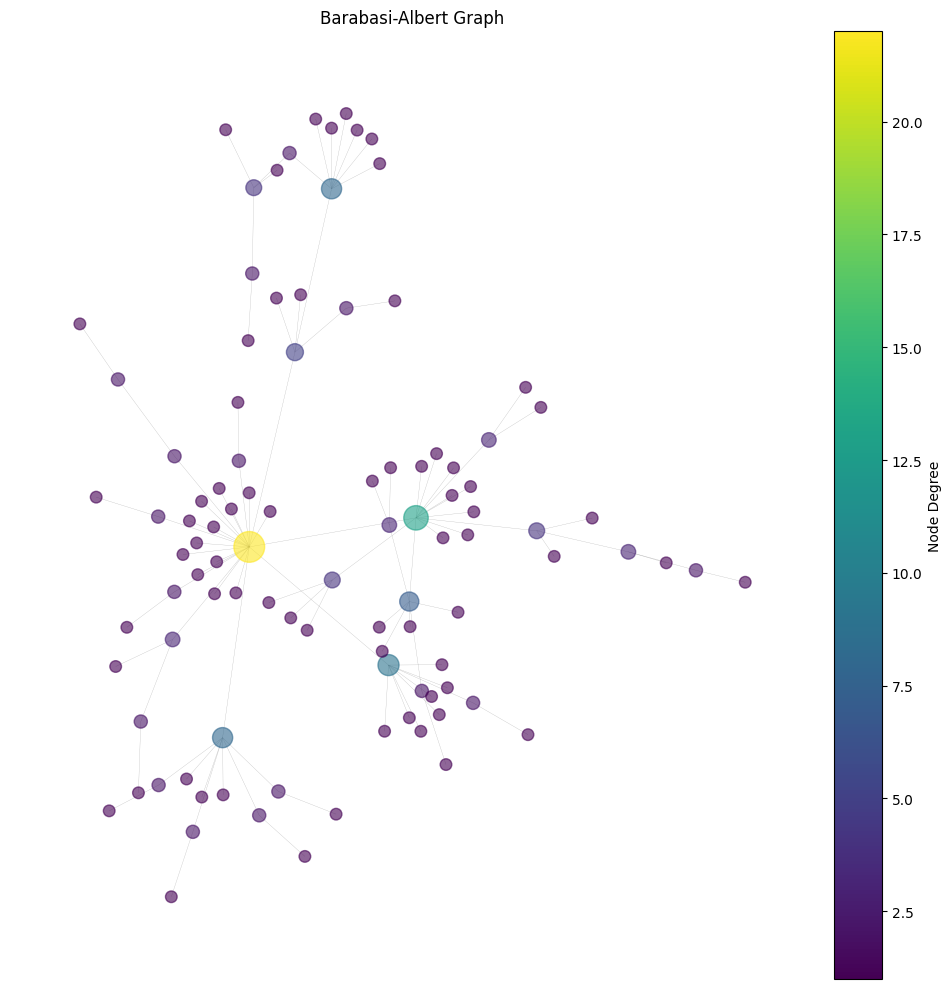

/var/folders/9w/0k1jwsw900bcpt3q6jvhj21w0000gn/T/ipykernel_1079/1832179736.py:77: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('viridis')


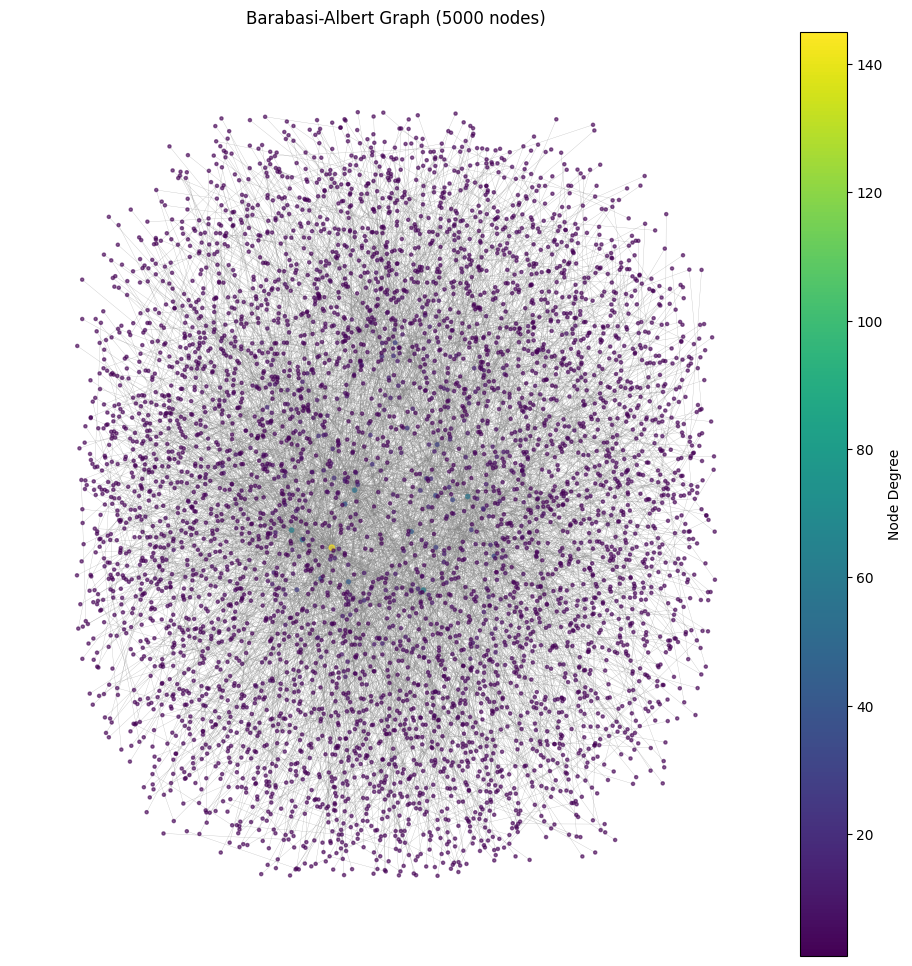

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random 

# Create graph consisting of a single link
G = nx.Graph()
G.add_edge(0,1)

# Add node connecting one of the existing nodes in proportion to their degree
G.add_node(2)
G.add_edge(0,2)

# Continue until we have 100 node network
for new_node in range(3,100):
    # Generate a list of all edges
    all_edges = list(G.edges())
    # Flatten it (remove connection information)
    flattened_edges = [item for sublist in all_edges for item in sublist]
    # Select a node from the flattened list with probability proportional to its degree
    selected_node = random.choice(flattened_edges)
    # Add a new node connecting to the selected node
    G.add_node(new_node)
    G.add_edge(new_node, selected_node)

# Nice viz :-)
# Calculate node colors based on degree
degree_sequence = [d for n, d in G.degree()]
max_degree = max(degree_sequence)
min_degree = min(degree_sequence)
color_map = plt.colormaps["viridis"]
node_colors = [color_map((d - min_degree) / (max_degree - min_degree)) for d in degree_sequence]

# Adjust node size based on degree
node_sizes = [50 + 20 * d for d in degree_sequence]

plt.figure(figsize=(10,10))

# some layout
pos = nx.spring_layout(G, k=0.15)

# Draw the graph
ax = plt.gca()
nx.draw(G, pos, node_size=node_sizes, node_color=node_colors, edge_color="grey", alpha=0.6, width=0.2, cmap=color_map, ax=ax)

# Add colorbar to indicate node degrees
sm = plt.cm.ScalarMappable(cmap=color_map, norm=plt.Normalize(vmin=min_degree, vmax=max_degree))
cbar = plt.colorbar(sm, orientation='vertical', pad=0.02)
cbar.set_label('Node Degree')

plt.title("Barabasi-Albert Graph")
plt.axis("off")
plt.tight_layout()
plt.show()



#Add more nodes until we have a 5000 n network.
for new_node in range(100,5000):
    #Generate a list of all edges
    all_edges = list(G.edges())

    #Flatten it (remove connection information)
    flattened_edges = [item for sublist in all_edges for item in sublist]

    # Select a node from the flattened list with probability proportional to its degree
    selected_node = random.choice(flattened_edges)
    
    # Add a new node connecting to the selected node
    G.add_node(new_node)
    G.add_edge(new_node, selected_node)

# Calculate node colors based on degree
degree_sequence = [d for n, d in G.degree()]
max_degree = max(degree_sequence)
min_degree = min(degree_sequence)
color_map = plt.cm.get_cmap('viridis')
node_colors = [color_map((d - min_degree) / (max_degree - min_degree)) for d in degree_sequence]

# Adjust node size based on degree (smaller sizes for larger graph)
node_sizes = [5 + 10 * (d / max_degree) for d in degree_sequence]

plt.figure(figsize=(12,12))

# Improved layout
pos = nx.spring_layout(G, k=0.05, iterations=10)  # Reduced iterations for faster computation

# Draw the graph and get the axis object for the colorbar
ax = plt.gca()
nx.draw(G, pos, node_size=node_sizes, node_color=node_colors, edge_color="grey", alpha=0.6, width=0.2, cmap=color_map, ax=ax)

# Add colorbar to indicate node degrees
sm = plt.cm.ScalarMappable(cmap=color_map, norm=plt.Normalize(vmin=min_degree, vmax=max_degree))
cbar = plt.colorbar(sm, orientation='vertical', pad=0.02, ax=ax)
cbar.set_label('Node Degree')

plt.title("Barabasi-Albert Graph (5000 nodes)")
plt.axis("off")
plt.show()





159 1


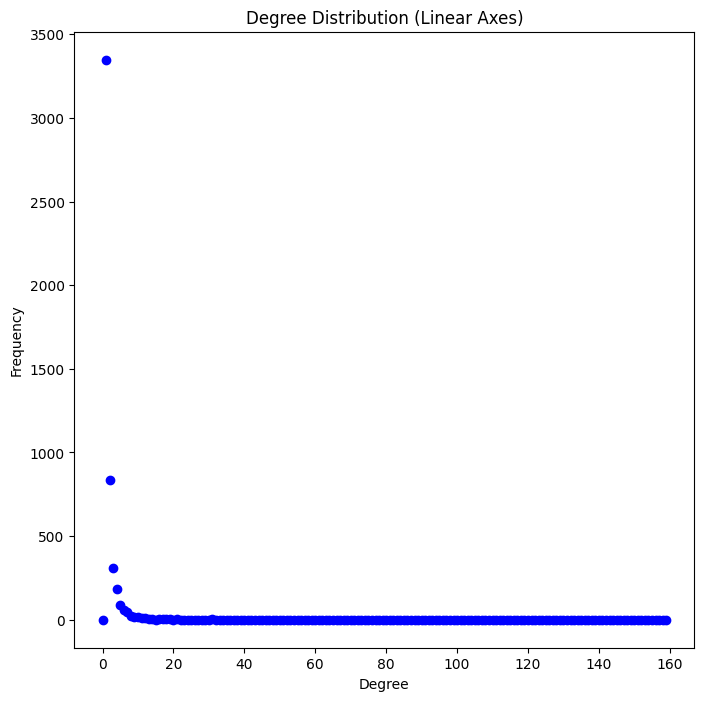

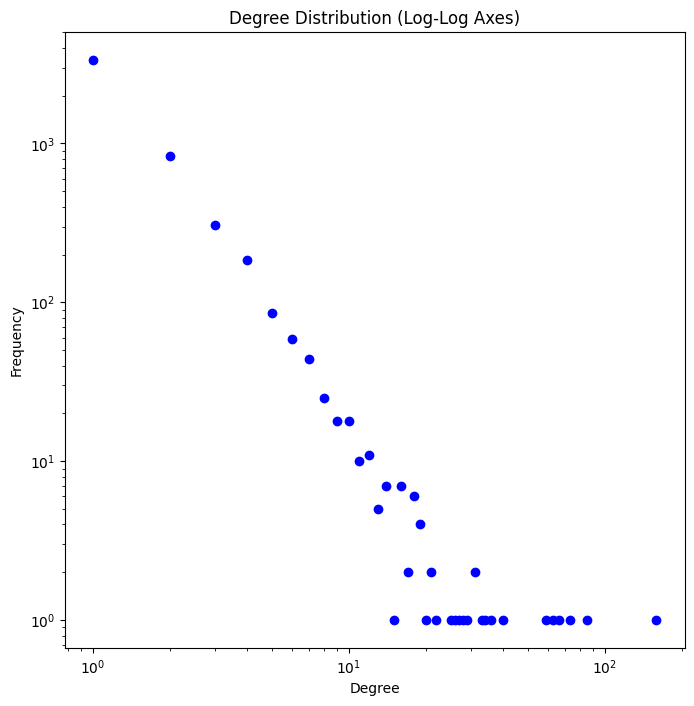

In [20]:
#calculate max and min degree
degrees = [val for (node, val) in G.degree()]  
max_degree = max(degrees)
min_degree = min(degrees)

print(max_degree, min_degree)

# Bin the degree distribution using numpy.histogram
bins = np.linspace(0, 200, 41)  # Bin edges from 0 to 200 with a width of 5
hist, bin_edges = np.histogram(degree_sequence, bins=bins)

# Plot the degree distribution with linear axes
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.bar(bin_edges[:-1], hist, width=4.8, align='edge')
plt.xlabel('Degree')
plt.ylabel('Count')
plt.title('Degree Distribution (Linear Axes)')

# Plot the degree distribution with log-log axes
plt.subplot(1, 2, 2)
plt.loglog(bin_edges[:-1], hist, 'o-')
plt.xlabel('Degree')
plt.ylabel('Count')
plt.title('Degree Distribution (Log-Log Axes)')

plt.tight_layout()
plt.show()


In [26]:

#Pick a node i at random
i = random.choice(list(G.nodes()))

#Find i's neighbors. calculate their average degree
neighbors = list(G.neighbors(i))
k_i = G.degree(i)
k_avg = 0

#Compare the two values to check if its true that i's friends on average have more friends than i
for j in neighbors:
    k_avg += G.degree(j)

k_avg = k_avg / len(neighbors)

print(f"Node {i} has degree {k_i} and its neighbors have average degree {k_avg}")

#Do this 1000 times and calculate the fraction of times it is true
num_checks = 1000
num_true = 0

for _ in range(num_checks):
    i = random.choice(list(G.nodes()))
    neighbors = list(G.neighbors(i))
    k_i = G.degree(i)
    k_avg = 0

    for j in neighbors:
        k_avg += G.degree(j)

    k_avg = k_avg / len(neighbors)

    if k_avg > k_i:
        num_true += 1

print(f"Fraction of times it is true: {num_true/num_checks}")








Node 122 has degree 2 and its neighbors have average degree 10.0
Fraction of times it is true: 0.865


#### Compare to ER network
Number of Connected Components:

Barabási–Albert Network: The network has 1 connected component, meaning it is entirely connected.
Erdős–Rényi Network: The network has 826 connected components, indicating that many nodes are isolated or part of smaller disconnected clusters.

## Part 3: Configuration-model networks


The Barabasi-Albert model introduced us to the importance of degree distributions. A very important class of random graphs allows us to create networks with _any_ degree distribution of our choice. The model used for creating such networks is called the **configuration model**

> **_Video Lecture_**: [The configuration model.](https://www.dropbox.com/scl/fi/9ti390zxbf3ymnuogp6a4/ConfigurationModel.mp4?rlkey=o9jclx4j77umv0d43htcozrp4&dl=0) Link: https://www.dropbox.com/scl/fi/9ti390zxbf3ymnuogp6a4/ConfigurationModel.mp4?rlkey=o9jclx4j77umv0d43htcozrp4&dl=0
> 

In this exercise, we will write a function that lets us create configuration model networks.

> *Exercises*: Configuration-model edition.
> 
> * First, let's create a configuration-model network with 4 nodes and the degree sequence [2,2,3,3]. That is, node 0 should have degree 2, node 1 degree 2, node 2 degree 3 and node 3 degree 3. In the code block following these exercises, I have created the skeleton for a function `configuration_model` that takes a degree sequence `degrees` like this as its input. 
> * Between the comments "STEP ONE GOES HERE" and "STEP ONE ENDS HERE" in the following code block, write some code that appends the integer _i_ to the list `halfedges` _k_ times, if the array `degrees` has _k_ on its _i_ th entry. _Hint:_ I solved this with a nested `for` loop.
> * Between the comments "STEP TWO GOES HERE" and "STEP TWO ENDS HERE" write some code that shuffles the `halfedges` list. _Hint:_ you could use the numpy function `np.random.shuffle()` for this.
> * `halfedges` now contains a lot of integers. Each integer _i_ represents an halfedge that node _i_ should have in your final network. Now we are ready to form edges from these halfedges. Between the comments "STEP THREE GOES HERE" and "STEP THREE ENDS HERE", write some code that appends a tuple _(i,j)_ to the list `edgelist` for every pair _(i,j)_ where _i_ is the integer on an even-numbered entry in `halfedges` and _j_ is the integer on the odd-numbered entry following that even-numbered entry.
> * Create a networkx graph with the degree sequence [2,2,3,3] using your `configuration_model` function. Does it look like what you expect? Do you notice any peculiar things about the network you created?
> * Now create another networkx graph with 200 nodes of degree 6 using your `configuration_model` function. Confirm that all nodes have degree 6.
> * Repeat the latter two questions using the `networkx` command `nx.configuration_model()` to create the networks from degree sequences.
> * Now extract the degree sequence for one of the Barabasi-Albert model you created in the previous exercise. Create a configuration-model network with that same degree sequence. 
> * _Bonus question_: Although these two latter networks may seem very similar, there are subtle differences. Can you find any?

In [28]:
def configuration_model (degrees) :
    
    halfedges = [] # a list of halfedges
    
    # Now append integer i to `halfedges` k times if the i'th entry of degrees is equal to k:
    for i, degree in enumerate(degrees):
        halfedges.extend([i]*degree)

    # STEP ONE ENDS HERE
    print("Check if the following ouput matches what you expect 'halfedges' to look like")
    print(halfedges)
    
    # Shuffle the list halfedges
    random.shuffle(halfedges)

    # Append the resulting edges to the list `edgelist` as tuples 
    # [that is, append (i,j) if i and j should be connected by and edge]
    
    edgelist = [(halfedges[i], halfedges[i + 1]) for i in range(0, len(halfedges), 2)]



    return edgelist #Return list of tuples indicating edges
        

# Test the function
test_degrees = [3, 2, 1, 4]
configuration_model(test_degrees)

Check if the following ouput matches what you expect 'halfedges' to look like
[0, 0, 0, 1, 1, 2, 3, 3, 3, 3]


[(1, 3), (3, 0), (2, 0), (1, 3), (3, 0)]

In [32]:
#Create a networkx graph with degree sequence [2,2,3,3] using your configuration_model function
G = nx.Graph()
G.add_edges_from(configuration_model([2,2,3,3]))

#Create networkx graph with 200 nodes of degree 6 using your configuration_model function
G = nx.Graph()
G.add_edges_from(configuration_model([6]*200))
#Confirm all nodes have degree 6
print("Node Degree")
for v in G:
    print(f"{v} {G.degree(v)}")

#Now extract the degree sequence for one of the Barabasi-Albert model you created in the previous exercise. Create a configuration-model network with that same degree sequence.

#Extract degree sequence from BA model
degrees = [val for (node, val) in G.degree()]

#Create configuration model using extracted degree sequence
G = nx.Graph()
G.add_edges_from(configuration_model(degrees))

#Confirm all nodes have the same degree as in the original BA model
print("Node Degree")
for v in G:
    print(f"{v} {G.degree(v)}")
    


Check if the following ouput matches what you expect 'halfedges' to look like
[0, 0, 1, 1, 2, 2, 2, 3, 3, 3]
Check if the following ouput matches what you expect 'halfedges' to look like
[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 30, 31, 31, 31, 31, 31, 31, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33, 33, 34, 34, 34, 34, 34, 34, 35, 35, 35, 35, 35, 35, 36, 36, 

The configuration model can introduce self-loops and multiple edges between the same nodes during its randomized edge-formation process, which can lead to discrepancies in the final network structure. The Barabási-Albert model, on the other hand, grows the network by preferentially attaching new nodes to existing nodes based on their degree, ensuring no self-loops and a unique growth mechanism.

